## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9626887	total: 70.1ms	remaining: 1m 10s
1:	learn: 0.9433831	total: 71.2ms	remaining: 35.5s
2:	learn: 0.9260059	total: 72.5ms	remaining: 24.1s
3:	learn: 0.9101063	total: 73.6ms	remaining: 18.3s
4:	learn: 0.8942901	total: 74.6ms	remaining: 14.8s
5:	learn: 0.8784392	total: 75.7ms	remaining: 12.5s
6:	learn: 0.8621483	total: 76.6ms	remaining: 10.9s
7:	learn: 0.8467296	total: 77.5ms	remaining: 9.61s
8:	learn: 0.8317685	total: 78.3ms	remaining: 8.62s
9:	learn: 0.8164837	total: 79.1ms	remaining: 7.83s
10:	learn: 0.8019997	total: 80ms	remaining: 7.19s
11:	learn: 0.7888569	total: 80.9ms	remaining: 6.66s
12:	learn: 0.7745721	total: 81.7ms	remaining: 6.21s
13:	learn: 0.7603534	total: 82.6ms	remaining: 5.82s
14:	learn: 0.7490916	total: 83.4ms	remaining: 5.47s
15:	learn: 0.7364921	total: 84.1ms	remaining: 5.17s
16:	learn: 0.7254065	total: 84.9ms	remaining: 4.91s
17:	learn: 0.7134981	total: 85.7ms	remaining: 4.67s
18:	learn: 0.7020234	total: 86.4ms	remaining:

45:	learn: 0.4948639	total: 109ms	remaining: 2.26s
46:	learn: 0.4906078	total: 110ms	remaining: 2.23s
47:	learn: 0.4850673	total: 111ms	remaining: 2.2s
48:	learn: 0.4800483	total: 112ms	remaining: 2.17s
49:	learn: 0.4746227	total: 113ms	remaining: 2.14s
50:	learn: 0.4698663	total: 113ms	remaining: 2.11s
51:	learn: 0.4643385	total: 114ms	remaining: 2.08s
52:	learn: 0.4594303	total: 115ms	remaining: 2.06s
53:	learn: 0.4561446	total: 116ms	remaining: 2.03s
54:	learn: 0.4507313	total: 117ms	remaining: 2s
55:	learn: 0.4463569	total: 117ms	remaining: 1.98s
56:	learn: 0.4424483	total: 118ms	remaining: 1.96s
57:	learn: 0.4374640	total: 119ms	remaining: 1.93s
58:	learn: 0.4343723	total: 120ms	remaining: 1.91s
59:	learn: 0.4304817	total: 121ms	remaining: 1.89s
60:	learn: 0.4256832	total: 122ms	remaining: 1.87s
61:	learn: 0.4217451	total: 122ms	remaining: 1.85s
62:	learn: 0.4180594	total: 123ms	remaining: 1.83s
63:	learn: 0.4147948	total: 124ms	remaining: 1.81s
64:	learn: 0.4110312	total: 125ms	r

146:	learn: 0.2667634	total: 193ms	remaining: 1.12s
147:	learn: 0.2658612	total: 194ms	remaining: 1.11s
148:	learn: 0.2648757	total: 195ms	remaining: 1.11s
149:	learn: 0.2639913	total: 196ms	remaining: 1.11s
150:	learn: 0.2632847	total: 196ms	remaining: 1.1s
151:	learn: 0.2623962	total: 197ms	remaining: 1.1s
152:	learn: 0.2615655	total: 198ms	remaining: 1.09s
153:	learn: 0.2606665	total: 199ms	remaining: 1.09s
154:	learn: 0.2600236	total: 200ms	remaining: 1.09s
155:	learn: 0.2593369	total: 200ms	remaining: 1.08s
156:	learn: 0.2585889	total: 202ms	remaining: 1.08s
157:	learn: 0.2575344	total: 203ms	remaining: 1.08s
158:	learn: 0.2565567	total: 204ms	remaining: 1.08s
159:	learn: 0.2558174	total: 205ms	remaining: 1.07s
160:	learn: 0.2551562	total: 205ms	remaining: 1.07s
161:	learn: 0.2542873	total: 207ms	remaining: 1.07s
162:	learn: 0.2535677	total: 208ms	remaining: 1.07s
163:	learn: 0.2524687	total: 209ms	remaining: 1.06s
164:	learn: 0.2520337	total: 209ms	remaining: 1.06s
165:	learn: 0.

274:	learn: 0.1941797	total: 300ms	remaining: 791ms
275:	learn: 0.1939424	total: 301ms	remaining: 789ms
276:	learn: 0.1933245	total: 302ms	remaining: 787ms
277:	learn: 0.1927998	total: 302ms	remaining: 785ms
278:	learn: 0.1925953	total: 303ms	remaining: 783ms
279:	learn: 0.1924248	total: 304ms	remaining: 782ms
280:	learn: 0.1920543	total: 305ms	remaining: 780ms
281:	learn: 0.1914165	total: 306ms	remaining: 778ms
282:	learn: 0.1909253	total: 306ms	remaining: 776ms
283:	learn: 0.1904776	total: 307ms	remaining: 775ms
284:	learn: 0.1901643	total: 308ms	remaining: 774ms
285:	learn: 0.1896503	total: 310ms	remaining: 773ms
286:	learn: 0.1893076	total: 311ms	remaining: 771ms
287:	learn: 0.1887712	total: 311ms	remaining: 770ms
288:	learn: 0.1882701	total: 312ms	remaining: 769ms
289:	learn: 0.1879296	total: 313ms	remaining: 767ms
290:	learn: 0.1875405	total: 314ms	remaining: 766ms
291:	learn: 0.1870817	total: 315ms	remaining: 764ms
292:	learn: 0.1864937	total: 316ms	remaining: 763ms
293:	learn: 

370:	learn: 0.1607146	total: 383ms	remaining: 650ms
371:	learn: 0.1603739	total: 384ms	remaining: 649ms
372:	learn: 0.1598153	total: 385ms	remaining: 647ms
373:	learn: 0.1592677	total: 386ms	remaining: 646ms
374:	learn: 0.1591350	total: 387ms	remaining: 644ms
375:	learn: 0.1588212	total: 387ms	remaining: 643ms
376:	learn: 0.1586736	total: 388ms	remaining: 642ms
377:	learn: 0.1583315	total: 389ms	remaining: 640ms
378:	learn: 0.1582548	total: 390ms	remaining: 639ms
379:	learn: 0.1579055	total: 391ms	remaining: 638ms
380:	learn: 0.1575088	total: 392ms	remaining: 636ms
381:	learn: 0.1573706	total: 392ms	remaining: 635ms
382:	learn: 0.1570612	total: 393ms	remaining: 633ms
383:	learn: 0.1565163	total: 394ms	remaining: 632ms
384:	learn: 0.1561819	total: 395ms	remaining: 631ms
385:	learn: 0.1556789	total: 396ms	remaining: 629ms
386:	learn: 0.1555366	total: 397ms	remaining: 628ms
387:	learn: 0.1551991	total: 397ms	remaining: 627ms
388:	learn: 0.1548774	total: 398ms	remaining: 625ms
389:	learn: 

497:	learn: 0.1308841	total: 490ms	remaining: 494ms
498:	learn: 0.1307006	total: 491ms	remaining: 493ms
499:	learn: 0.1306093	total: 492ms	remaining: 492ms
500:	learn: 0.1303996	total: 493ms	remaining: 491ms
501:	learn: 0.1301897	total: 494ms	remaining: 490ms
502:	learn: 0.1300630	total: 495ms	remaining: 489ms
503:	learn: 0.1298971	total: 496ms	remaining: 488ms
504:	learn: 0.1296997	total: 497ms	remaining: 487ms
505:	learn: 0.1296302	total: 497ms	remaining: 486ms
506:	learn: 0.1293709	total: 498ms	remaining: 484ms
507:	learn: 0.1291506	total: 499ms	remaining: 483ms
508:	learn: 0.1288710	total: 500ms	remaining: 482ms
509:	learn: 0.1287978	total: 501ms	remaining: 481ms
510:	learn: 0.1284577	total: 502ms	remaining: 480ms
511:	learn: 0.1281275	total: 502ms	remaining: 479ms
512:	learn: 0.1277767	total: 503ms	remaining: 478ms
513:	learn: 0.1276991	total: 504ms	remaining: 477ms
514:	learn: 0.1276448	total: 505ms	remaining: 476ms
515:	learn: 0.1273796	total: 506ms	remaining: 475ms
516:	learn: 

598:	learn: 0.1113625	total: 574ms	remaining: 384ms
599:	learn: 0.1110752	total: 575ms	remaining: 383ms
600:	learn: 0.1108391	total: 576ms	remaining: 382ms
601:	learn: 0.1106987	total: 577ms	remaining: 381ms
602:	learn: 0.1104499	total: 578ms	remaining: 380ms
603:	learn: 0.1102155	total: 578ms	remaining: 379ms
604:	learn: 0.1100662	total: 579ms	remaining: 378ms
605:	learn: 0.1098611	total: 580ms	remaining: 377ms
606:	learn: 0.1097572	total: 581ms	remaining: 376ms
607:	learn: 0.1095825	total: 582ms	remaining: 375ms
608:	learn: 0.1095339	total: 582ms	remaining: 374ms
609:	learn: 0.1093935	total: 583ms	remaining: 373ms
610:	learn: 0.1092072	total: 584ms	remaining: 372ms
611:	learn: 0.1090463	total: 585ms	remaining: 371ms
612:	learn: 0.1088953	total: 586ms	remaining: 370ms
613:	learn: 0.1088681	total: 586ms	remaining: 369ms
614:	learn: 0.1086378	total: 587ms	remaining: 368ms
615:	learn: 0.1084288	total: 588ms	remaining: 367ms
616:	learn: 0.1082262	total: 589ms	remaining: 366ms
617:	learn: 

729:	learn: 0.0923993	total: 681ms	remaining: 252ms
730:	learn: 0.0921970	total: 683ms	remaining: 251ms
731:	learn: 0.0920844	total: 684ms	remaining: 250ms
732:	learn: 0.0920220	total: 684ms	remaining: 249ms
733:	learn: 0.0918276	total: 685ms	remaining: 248ms
734:	learn: 0.0917543	total: 686ms	remaining: 247ms
735:	learn: 0.0916124	total: 687ms	remaining: 246ms
736:	learn: 0.0915732	total: 688ms	remaining: 245ms
737:	learn: 0.0914077	total: 688ms	remaining: 244ms
738:	learn: 0.0913064	total: 689ms	remaining: 243ms
739:	learn: 0.0911659	total: 690ms	remaining: 242ms
740:	learn: 0.0911153	total: 691ms	remaining: 241ms
741:	learn: 0.0909802	total: 692ms	remaining: 240ms
742:	learn: 0.0908234	total: 692ms	remaining: 239ms
743:	learn: 0.0906747	total: 693ms	remaining: 239ms
744:	learn: 0.0905644	total: 694ms	remaining: 238ms
745:	learn: 0.0904484	total: 695ms	remaining: 237ms
746:	learn: 0.0902243	total: 696ms	remaining: 236ms
747:	learn: 0.0900914	total: 697ms	remaining: 235ms
748:	learn: 

828:	learn: 0.0805856	total: 764ms	remaining: 158ms
829:	learn: 0.0804616	total: 765ms	remaining: 157ms
830:	learn: 0.0804195	total: 766ms	remaining: 156ms
831:	learn: 0.0802788	total: 767ms	remaining: 155ms
832:	learn: 0.0801728	total: 768ms	remaining: 154ms
833:	learn: 0.0800976	total: 769ms	remaining: 153ms
834:	learn: 0.0799507	total: 770ms	remaining: 152ms
835:	learn: 0.0798043	total: 771ms	remaining: 151ms
836:	learn: 0.0796586	total: 772ms	remaining: 150ms
837:	learn: 0.0794624	total: 773ms	remaining: 149ms
838:	learn: 0.0793587	total: 773ms	remaining: 148ms
839:	learn: 0.0792143	total: 774ms	remaining: 147ms
840:	learn: 0.0791030	total: 775ms	remaining: 147ms
841:	learn: 0.0790186	total: 776ms	remaining: 146ms
842:	learn: 0.0788954	total: 777ms	remaining: 145ms
843:	learn: 0.0787611	total: 778ms	remaining: 144ms
844:	learn: 0.0786969	total: 778ms	remaining: 143ms
845:	learn: 0.0785298	total: 779ms	remaining: 142ms
846:	learn: 0.0783575	total: 780ms	remaining: 141ms
847:	learn: 

956:	learn: 0.0673562	total: 871ms	remaining: 39.2ms
957:	learn: 0.0672958	total: 872ms	remaining: 38.2ms
958:	learn: 0.0672238	total: 873ms	remaining: 37.3ms
959:	learn: 0.0671583	total: 874ms	remaining: 36.4ms
960:	learn: 0.0670478	total: 875ms	remaining: 35.5ms
961:	learn: 0.0669735	total: 876ms	remaining: 34.6ms
962:	learn: 0.0668203	total: 876ms	remaining: 33.7ms
963:	learn: 0.0666665	total: 877ms	remaining: 32.8ms
964:	learn: 0.0665634	total: 878ms	remaining: 31.8ms
965:	learn: 0.0664801	total: 879ms	remaining: 30.9ms
966:	learn: 0.0663518	total: 880ms	remaining: 30ms
967:	learn: 0.0662227	total: 880ms	remaining: 29.1ms
968:	learn: 0.0661204	total: 881ms	remaining: 28.2ms
969:	learn: 0.0660265	total: 882ms	remaining: 27.3ms
970:	learn: 0.0658909	total: 883ms	remaining: 26.4ms
971:	learn: 0.0658797	total: 884ms	remaining: 25.5ms
972:	learn: 0.0657967	total: 884ms	remaining: 24.5ms
973:	learn: 0.0657298	total: 885ms	remaining: 23.6ms
974:	learn: 0.0656642	total: 886ms	remaining: 22

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

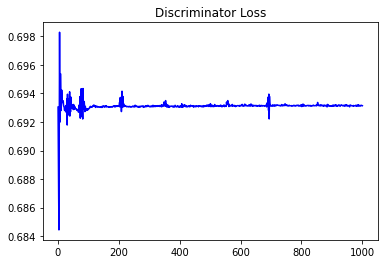

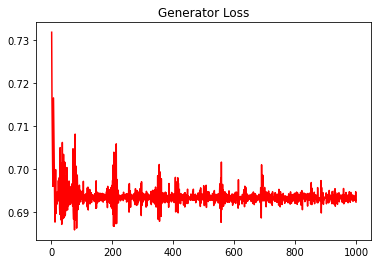

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08678904352099237


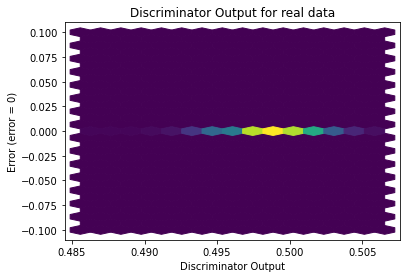

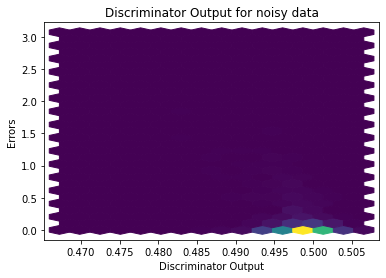

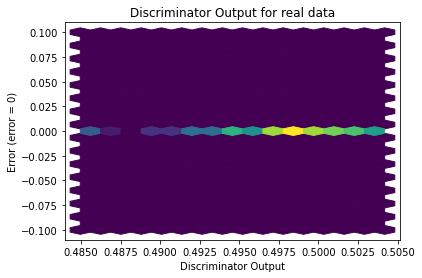

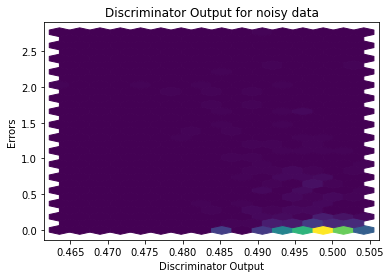

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


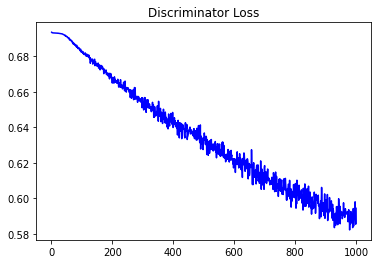

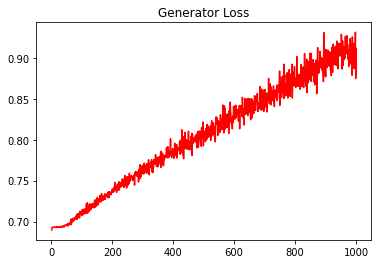

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07526220769707054


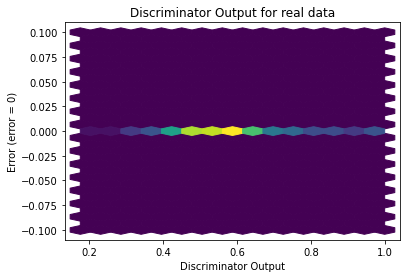

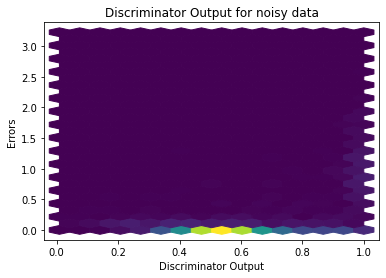

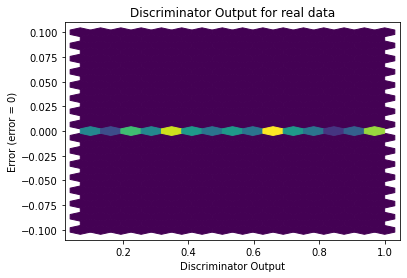

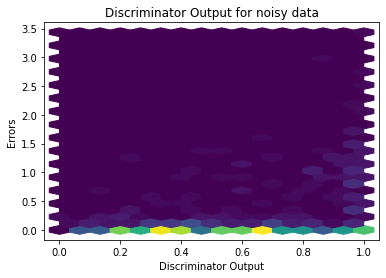

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
